# This Script for Calculating the Velocities and Parameters for simple Arm Motion. 


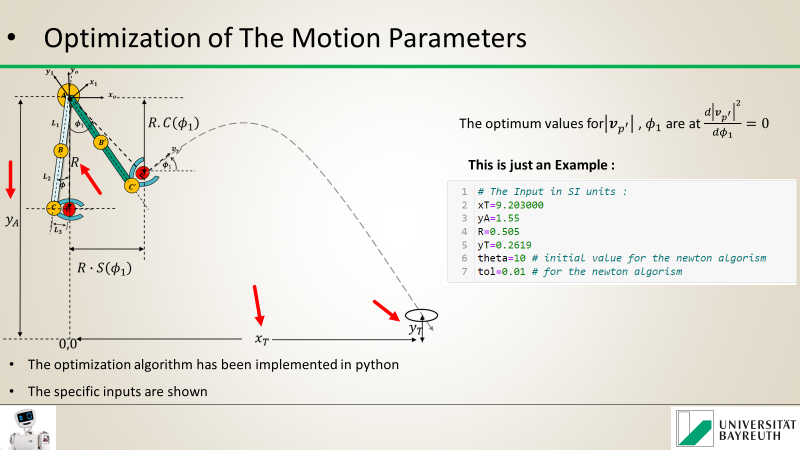

In [1]:
from PIL import Image
import matplotlib.pyplot as plt 

display(Image.open('Projectile-Motion.png'))

# Please specify the Input values as shown in the figure above
# all values are in SI  :

In [2]:
import math
import numpy as np

$\large INPUT $

In [3]:
# The Input in SI units :
xT=4.203000
yA=1.55
R=0.505
yT=0.2619
theta=10 # initial value for the newton algorism
tol=0.01 # for the newton algorism

# Do not change any part below *

$\large{  v_{o}^2 =\frac{g\Delta x^2}{Sin(2\theta)-2\Delta y Cos(\theta)^2} } $
\
\
$ \large{ G=g\Delta x^2 , k= sin(2\theta)-2\Delta ycos(\theta)^2 }$
\
\
$\large{ \frac{dv_{o}^2}{d\theta}  = 0 }$
\
\
$ \large{ f= k\frac{dG}{d\theta}-G\frac{dK}{d\theta} }$
\
\
$ \large{ f'(\theta)= k\frac{d^2G}{d\theta^2}-G\frac{d^2K}{d\theta^2} }$
\
\
For Using Newton Method :
\
\
$\large { \theta_{n+1}=\theta_n- \frac{f(\theta)}{f'(\theta)}} $
\
\
$\large {G'(\theta)= -2g\Delta x Rcos(\theta)} $
\
\
$\large {k'(\theta)= 2 g \Delta x \Delta x'(\theta)} $
\
\
$\large {k''(\theta)= 2 g \Delta x \Delta x'(\theta)} $
\
\
$\large {G''(\theta)= g R^2 (2 cos(\theta)^2-sin(2\theta) )} $



In [4]:
def Dx(xT,R,theta) :
    x=xT-R*math.sin(math.radians(theta))
    return x
def dx(xT,R,theta) :
    dx=-R*math.cos(math.radians(theta))
    return dx
def Dy(yT,yA,R,theta) :
    y=yT-yA+R*math.cos(math.radians(theta))
    return y
def dy(yT,yA,R,theta) :
    dy=-R*math.sin(math.radians(theta))
    return dy
def G(xT,yT,yA,R,theta):
    G=9.81* Dx(xT,R,theta)**2
    return G
def dG(xT,yT,yA,R,theta):
    dG=2*9.81* Dx(xT,R,theta)*dx(xT,R,theta)
    return dG
def ddG(xT,yT,yA,R,theta):
    ddG=(9.81*R**2)*( 2*math.cos(math.radians(theta))**2  - math.sin(math.radians(2*theta)) ) 
    return ddG
def k(xT,yT,yA,R,theta):
    k=math.sin(math.radians(2*theta))*Dx(xT,R,theta)-2*Dy(yT,yA,R,theta)*math.cos(math.radians(theta))**2
    return k
def dk(xT,yT,yA,R,theta):
    dk=2* Dx(xT,R,theta)*math.cos(math.radians(2*theta)) + 2* Dy(yT,yA,R,theta)*math.sin(math.radians(2*theta))
    return dk
def ddk(xT,yT,yA,R,theta):
    ddk= 4* Dy(yT,yA,R,theta)*math.cos(math.radians(2*theta)) - 4* Dx(xT,R,theta)*math.sin(math.radians(2*theta)) -2*R*math.cos(math.radians(2*theta))
    return ddk
def f(xT,yT,yA,R,theta):
    f= k(xT,yT,yA,R,theta)*dG(xT,yT,yA,R,theta)-G(xT,yT,yA,R,theta)*dk(xT,yT,yA,R,theta)
    return f
def df(xT,yT,yA,R,theta):
    df= k(xT,yT,yA,R,theta)*ddG(xT,yT,yA,R,theta)-G(xT,yT,yA,R,theta)*ddk(xT,yT,yA,R,theta)
    return df
def Newton_Theta(xT,yT,yA,R,theta,tol):
    while abs(f(xT,yT,yA,R,theta)) > tol : 
           theta=theta- f(xT,yT,yA,R,theta)/df(xT,yT,yA,R,theta)
    return  theta 

# Do not change any part above *

# This to solve for the input values 

In [5]:
opt_angle=Newton_Theta(xT,yT,yA,R,theta,tol)
opt_velo=np.sqrt ( G(xT,yT,yA,R,opt_angle)/k(xT,yT,yA,R,opt_angle) )
dX=np.arange(start=0, stop=xT+0.1*xT, step=0.1)
X=dX+R*math.sin(math.radians(opt_angle))
def fY(dx,opt_velo,opt_angle) :
    fY=math.tan(math.radians(opt_angle))*dX-(9.81*dX**2)/(2*(math.cos(math.radians(opt_angle))**2)*opt_velo**2)
    return fY
Y_1=fY(dX,opt_velo,opt_angle)
Y=Y_1+(yA-R*math.cos(math.radians(opt_angle)) )
t=2*math.radians(opt_angle)/(opt_velo/R)
ang_acce= ((opt_velo/R)**2 )/(2*math.radians(opt_angle))
ang_velo=ang_acce*t
T=[]
A_vel=[]

T.append(0)
T.append(t)
A_vel.append(0)
A_vel.append(ang_velo)

# Check The Important Results Below

In [6]:
print("The optimum angle = ",opt_angle ) 
print("The optimum velocity = ",opt_velo )

The optimum angle =  41.785400818148
The optimum velocity =  5.495684216951571


In [7]:
print("The Time of arm to reach optimum angle = ",t ) 
print("The  required moving angluar acceleration = ",ang_acce )

The Time of arm to reach optimum angle =  0.1340298537360681
The  required moving angluar acceleration =  81.19491815080562


# Plotting the Optimum conitions for the velocity and launching angle

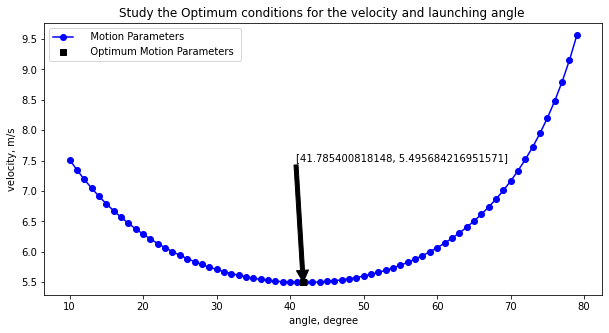

In [8]:
angles=np.arange(10,80,1)
velocity=[]
for i in range (len(angles)):
    velocity.append(np.sqrt ( G(xT,yT,yA,R,angles[i])/k(xT,yT,yA,R,angles[i] ) ))

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(angles,velocity,'bo-',label= '   Motion Parameters  ')
plt.plot(opt_angle,opt_velo,'ks',label= '   Optimum Motion Parameters ')
plt.annotate([opt_angle,opt_velo], xy=(opt_angle,opt_velo), xytext=(opt_angle-1,opt_velo+2),arrowprops=dict(facecolor='black', shrink=0.001))

plt.xlabel('angle, degree')
plt.ylabel('velocity, m/s' )

plt.title("Study the Optimum conditions for the velocity and launching angle ")

plt.legend()

plt.show()

# Check the results : that the projectile motion will pass by the target

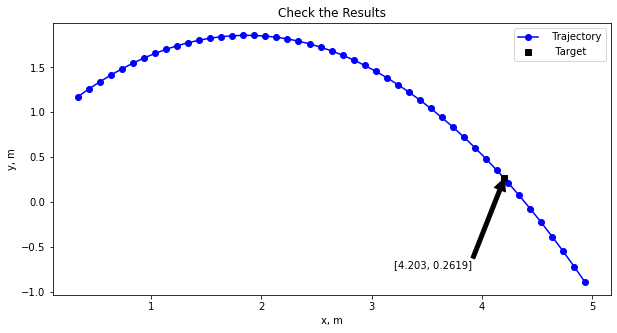

In [9]:
plt.plot(X,Y,'bo-',label= '  Trajectory')
plt.plot(xT,yT,'ks',label= '   Target ')
plt.annotate([xT,yT], xy=(xT,yT), xytext=(xT-1,yT-1),arrowprops=dict(facecolor='black', shrink=0.001))
plt.xlabel('x, m')
plt.ylabel('y, m' )
plt.title("Check the Results")
plt.legend()
plt.show()

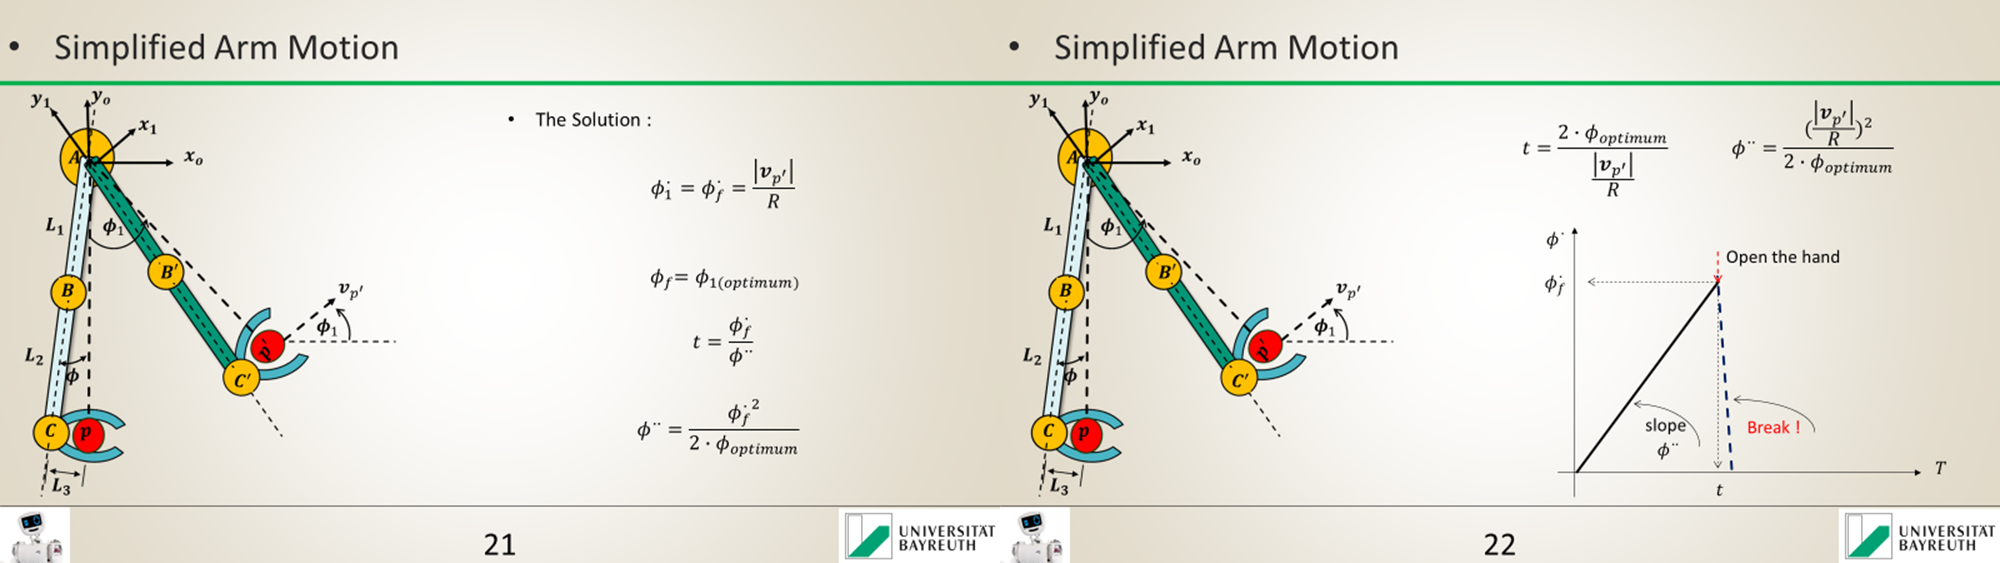

In [10]:
display(Image.open('Arm-Motion.png'))

# Based on the slides above, the garph shows the  time of arm to reach optimum angle , the  required moving angluar acceleration

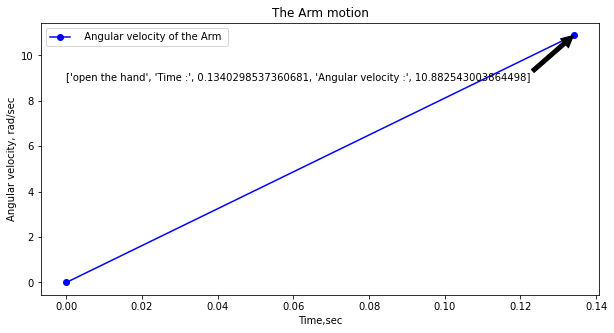

In [11]:
plt.plot(T,A_vel,'bo-',label= '  Angular velocity of the Arm ')
plt.annotate(["open the hand","Time :" ,t,"Angular velocity :",ang_velo], xy=(t,ang_velo), xytext=(0 , ang_velo-2),arrowprops=dict(facecolor='black', shrink=0.001))
plt.xlabel('Time,sec')
plt.ylabel('Angular velocity, rad/sec')
plt.title("The Arm motion")
plt.legend()
plt.show()